In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, holistic_model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = holistic_model.process(image)        # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def extract_keypoints(results, image):
    # Trích xuất tọa độ x, y của ngón trỏ (index 8)
    if results.left_hand_landmarks:
        # Lấy tọa độ ngón trỏ (điểm mốc thứ 8)
        index_finger = results.left_hand_landmarks.landmark[8]
        return np.array([index_finger.x, index_finger.y])  # Tọa độ x, y của ngón trỏ
    else:
        # Nếu không phát hiện tay trái, trả về [0, 0]
        return np.zeros(2)


def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [3]:
def normalize_points(points):
    origin = points[0]
    normalized_points = points - origin
    return normalized_points

In [4]:
def save_keypoints(action, videoCounter, keypoints):
    npy_dir = os.path.join('new_data_npy', action)
    os.makedirs(npy_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại
    
    # Lưu keypoints vào tệp .npy
    npy_path = os.path.join(npy_dir, f'{videoCounter}.npy')
    np.save(npy_path, keypoints)
    print(f'{action}: saving frame of video {videoCounter}')

In [5]:
def process_npy(action):    
    # Khởi tạo mô hình Mediapipe Holistic
    with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
        
        # Lấy danh sách tất cả video trong thư mục của action cụ thể
        video_folder = f'data/{action}'
        videos = [f for f in os.listdir(video_folder) if f.endswith('.avi')]
        
        for videoCounter, videoFile in enumerate(videos):
            cap = cv2.VideoCapture(os.path.join(video_folder, videoFile))
            framesCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            points = []
            # Không cần skip frame nữa, xử lý tất cả frame
            for frameCounter in range(framesCount):  # Xử lý tất cả các frame trong video
                ret, frame = cap.read()
                
                if not ret:
                    break  # Nếu không đọc được frame thì dừng
                
                # Chạy Mediapipe để phát hiện landmarks
                image, results = mediapipe_detection(frame, holistic)
                
                # Hiển thị kết quả (có thể bỏ qua nếu không cần thiết)
                # cv2.imshow('OpenCV Feed', image)
                
                # Trích xuất keypoints từ kết quả Mediapipe
                keypoints = extract_keypoints(results, image)
                
                points.append(keypoints)
                
            points = np.array(points)
            # points = normalize_points(points)
            
            save_keypoints(action, videoCounter, points)
                
            # Nếu nhấn 'q', thoát khỏi quá trình xử lý
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
            # Giải phóng tài nguyên video sau khi xử lý xong
            cap.release()
    
    # Đóng tất cả cửa sổ OpenCV
    cv2.destroyAllWindows()

In [6]:
classes = ['idle', 'up', 'down', 'left', 'right']

label_map = {label:num for num, label in enumerate(classes)}
label_map

{'idle': 0, 'up': 1, 'down': 2, 'left': 3, 'right': 4}

In [7]:
process_npy('right')

d:\Phong\Coding\HandTracking\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


right: saving frame of video 0
right: saving frame of video 1
right: saving frame of video 2
right: saving frame of video 3
right: saving frame of video 4
right: saving frame of video 5
right: saving frame of video 6
right: saving frame of video 7
right: saving frame of video 8
right: saving frame of video 9
right: saving frame of video 10
right: saving frame of video 11
right: saving frame of video 12
right: saving frame of video 13
right: saving frame of video 14
right: saving frame of video 15
right: saving frame of video 16
right: saving frame of video 17
right: saving frame of video 18
right: saving frame of video 19
right: saving frame of video 20
right: saving frame of video 21
right: saving frame of video 22
right: saving frame of video 23
right: saving frame of video 24
right: saving frame of video 25
right: saving frame of video 26
right: saving frame of video 27
right: saving frame of video 28
right: saving frame of video 29
right: saving frame of video 30
right: saving fram

In [11]:
process_npy('left')

left: saving frame of video 0
left: saving frame of video 1
left: saving frame of video 2
left: saving frame of video 3
left: saving frame of video 4
left: saving frame of video 5
left: saving frame of video 6
left: saving frame of video 7
left: saving frame of video 8
left: saving frame of video 9
left: saving frame of video 10
left: saving frame of video 11
left: saving frame of video 12
left: saving frame of video 13
left: saving frame of video 14
left: saving frame of video 15
left: saving frame of video 16
left: saving frame of video 17
left: saving frame of video 18
left: saving frame of video 19
left: saving frame of video 20
left: saving frame of video 21
left: saving frame of video 22
left: saving frame of video 23
left: saving frame of video 24
left: saving frame of video 25
left: saving frame of video 26
left: saving frame of video 27
left: saving frame of video 28
left: saving frame of video 29
left: saving frame of video 30
left: saving frame of video 31
left: saving frame

In [12]:
data = np.load('new_data_npy/right/346.npy')
print(data)

[[0.78558534 0.61959749]
 [0.75256038 0.63727236]
 [0.70520961 0.6893658 ]
 [0.71512657 0.61294693]
 [0.70721656 0.62914658]
 [0.69627142 0.6174832 ]
 [0.68760175 0.60158682]
 [0.65427482 0.6272223 ]
 [0.64870226 0.62758714]
 [0.6360966  0.62275755]
 [0.59567153 0.6146121 ]
 [0.         0.        ]
 [0.         0.        ]
 [0.56966054 0.50463265]
 [0.55190814 0.46656057]]


In [12]:
def create_dataset():
    data, labels = [], []

    # Duyệt qua tất cả các lớp hành động
    for action in classes:
        # Thư mục chứa các file .npy của lớp hành động
        action_folder = os.path.join('data_npy', action)
        
        if not os.path.exists(action_folder):
            print(f"Thư mục {action_folder} không tồn tại.")
            continue

        # Lấy danh sách các file .npy trong lớp hành động, sắp xếp theo thứ tự
        npy_files = sorted([f for f in os.listdir(action_folder) if f.endswith('.npy')], key=lambda x: int(x.split('.')[0]))
        
        print(f"Đang xử lý {len(npy_files)} files cho lớp {action}.")
        
        # Duyệt qua từng file .npy và lưu dữ liệu
        for npy_file in npy_files:
            file_path = os.path.join(action_folder, npy_file)
            features = np.load(file_path)  # Đọc file .npy
            data.append(features)
            labels.append(label_map[action])  # Gắn nhãn tương ứng với hành động

    return np.array(data), np.array(labels)

sequences, labels = create_dataset()

print(f"Tổng số sequences: {len(sequences)}")
print(f"Tổng số labels: {len(labels)}")
print(f"Shape của sequences: {np.array(sequences).shape}")
print(f"Shape của labels: {np.array(labels).shape}")

# print(sequences, labels)

Đang xử lý 500 files cho lớp idle.
Đang xử lý 500 files cho lớp up.
Đang xử lý 500 files cho lớp down.
Đang xử lý 504 files cho lớp left.
Đang xử lý 506 files cho lớp right.
Tổng số sequences: 2510
Tổng số labels: 2510
Shape của sequences: (2510, 15, 2)
Shape của labels: (2510,)


In [13]:
np.save("data.npy", sequences)
np.save("labels.npy", labels)

In [31]:
X = np.load('data.npy')
y = np.load('labels.npy')

print(X.shape)
print(y)

(2510, 15, 2)
[0 0 0 ... 4 4 4]


In [32]:
y = to_categorical(y, num_classes=len(classes))
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
y_val.shape

# print(y_train)

(502, 5)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15, 2)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

d:\Phong\Coding\HandTracking\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 15, 64)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,549 (486.52 KB)

 Trainable params: 124,549 (486.52 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Tạo callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # theo dõi loss trên tập validation
                               patience=20,          # số epoch không cải thiện để dừng
                               restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4143 - loss: 1.5227 - val_accuracy: 0.6375 - val_loss: 1.2033
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6622 - loss: 1.0634 - val_accuracy: 0.6892 - val_loss: 0.8701
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7347 - loss: 0.7654 - val_accuracy: 0.7629 - val_loss: 0.6966
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7803 - loss: 0.6402 - val_accuracy: 0.8048 - val_loss: 0.5854
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7957 - loss: 0.5900 - val_accuracy: 0.7928 - val_loss: 0.6033
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8080 - loss: 0.5430 - val_accuracy: 0.8287 - val_loss: 0.5073
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8281 - loss: 0.5102 - val_accuracy: 0.8227 - val_loss: 0.4834
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8329 - loss: 0.4813 - val_accuracy: 0.8426

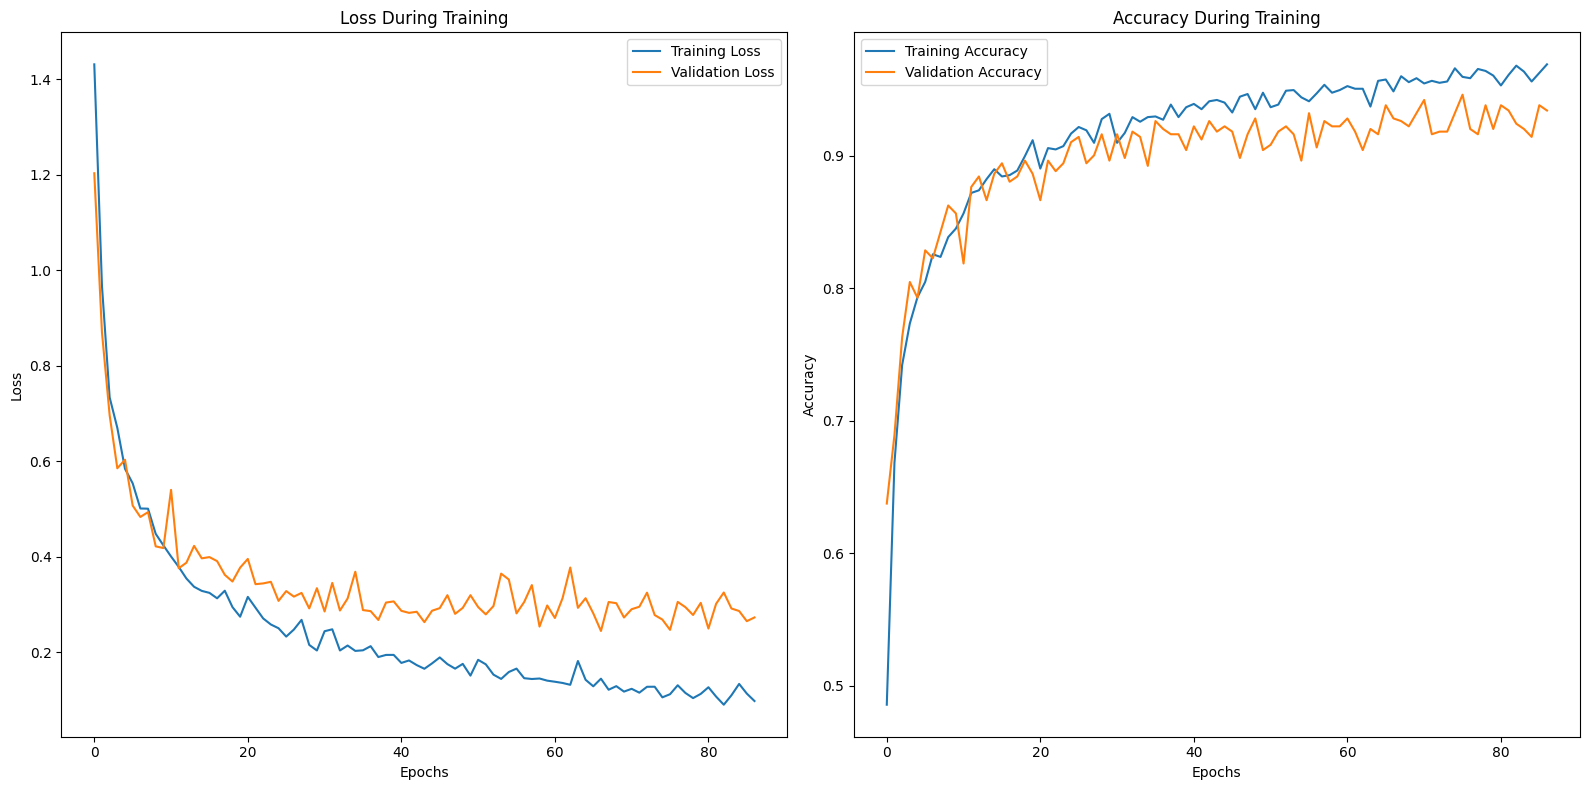

In [36]:
# Plot the loss and accuracy graphs together
plt.figure(figsize=(16, 8))

# Plot the loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
res = model.predict(X_val)
# classes[np.argmax(res[4])]
print(np.argmax(res[5]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
1


In [38]:
# yhat = model.predict(X_test)
# ytrue = y_test

# yhat = (yhat > 0.5).astype(int)

# confusion_matrix(y_test, yhat)

In [39]:
colors = [(245,117,16), (117,245,16), (16,117,245), (16,234,245), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [40]:
# 1. New detection variables
keys = []
sentence = []
predictions = []
threshold = 0.7
frame_counter = 0  # Khởi tạo biến đếm

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        frame_counter += 1  # Tăng biến đếm lên mỗi khi đọc khung hình
        if frame_counter % 2 != 0:  # Chỉ xử lý mỗi khung hình thứ 3 (tùy chỉnh)
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results, image)
        
        keys.append(keypoints)
        sequence = np.array(keys[-15:])
        sequence = normalize_points(sequence)
        
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(np.argmax(res))
            print(classes[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Viz probabilities
            image = prob_viz(res, classes, image, colors)
            
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

d:\Phong\Coding\HandTracking\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0
idle
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0
idl

In [24]:
model.save('movement_direction.keras')